In [1]:
import numpy as np


In [2]:
#hidden file
from PIL import Image
hfile = Image.open("friendss.jpg")

In [3]:

print(hfile.bits, hfile.size, hfile.format)

(8, (1024, 1024), 'JPEG')


In [4]:
# original file
from PIL import Image
ofile = Image.open("background1.jpg")

In [5]:

print(ofile.bits, ofile.size, ofile.format)

(8, (298, 190), 'JPEG')


In [6]:
width = 500
height = 420
# use one of these filter options to resize the image
im1 = ofile.resize((width, height), Image.NEAREST) 

### Resizing the image

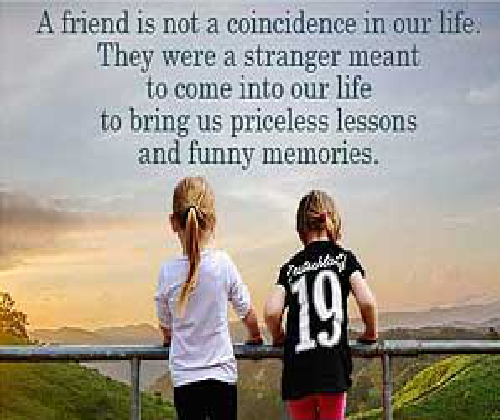

In [7]:
im1

In [8]:
width = 500
height = 420
# use one of these filter options to resize the image
im2 = hfile.resize((width, height), Image.NEAREST) 

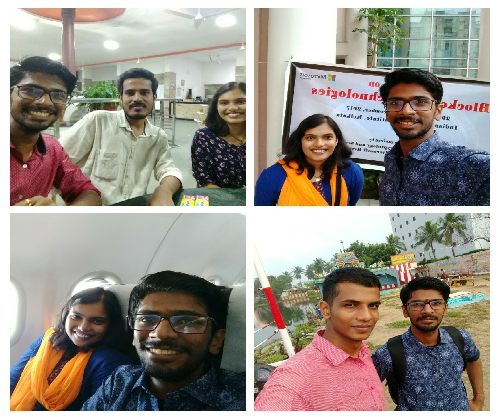

In [9]:
im2

### Accesing pixel values

In [10]:
no = 2
bits = 8

def dec2bin(no,bits):
    res = np.zeros((1,bits))
    k = -1
    for i in range(bits):
        if (no%2 == 0):

            res[0,k] = 0
        else:

            res[0,k] = 1
        k = k - 1
        no = (no - no%2) / 2
    dec2bin = res[0].astype(np.int)
    return dec2bin

### Image to bits

In [11]:
def image2bits(im2,width,height,bits):
    R = []
    Rim =[]
    G = []
    Gim = []
    B = []
    Bim = []
    for i in range(0, width):
        for j in range(0, height):
            r, g, b = im2.getpixel((i,j))
            R.append(dec2bin(r,bits))
            G.append(dec2bin(g,bits))
            B.append(dec2bin(b,bits))
        Rim.append(R)
        R =[]
        Gim.append(G)
        G =[]
        Bim.append(B)
        B=[]
    return Rim, Gim, Bim

In [12]:
Rim1 , Gim1, Bim1 = image2bits(im1, width, height, bits)

In [13]:
Rim2 , Gim2, Bim2 = image2bits(im2, width, height, bits)

### Least Significant Bit based Encryption

#### here im1 is cover image and im2 is hidden image

In [14]:
# Making a copy
Rim1c = Rim1
Rim2c = Rim2
Bim1c = Bim1
Bim2c = Bim2
Gim1c = Gim1
Gim2c = Gim2

### Encrypting

In [15]:
for i in range(0,width):
    for j in range(0,height):
        
        Rim1c[i][j][4:8] = Rim2c[i][j][0:4]
        Gim1c[i][j][4:8] = Gim2c[i][j][0:4]
        Bim1c[i][j][4:8] = Bim2c[i][j][0:4]
            
    

In [16]:

Re = np.zeros((width, height))
Ge = np.zeros((width, height))
Be = np.zeros((width, height))
for i in range(0,width):
    for j in range(0, height):
        reim = 0
        geim = 0
        beim = 0
        for k in range(0,bits):
            reim +=  Rim1c[i][j][k] * (2 ** (bits -1 - k))
            geim +=  Gim1c[i][j][k] * (2 ** (bits -1 - k))
            beim +=  Bim1c[i][j][k] * (2 ** (bits -1 - k))
        Re[i,j] = (reim)
        Ge[i,j] = (geim)
        Be[i,j] = (beim)


In [17]:
image= np.zeros((height, width,3),dtype = np.uint8)

In [18]:
image[:,:,0] = Re.T
image[:,:,1] = Ge.T
image[:,:,2] = Be.T

In [19]:
eim = Image.fromarray(image,  'RGB')
eim.save("encrypted_image.png")

### Displaying Encrypted image

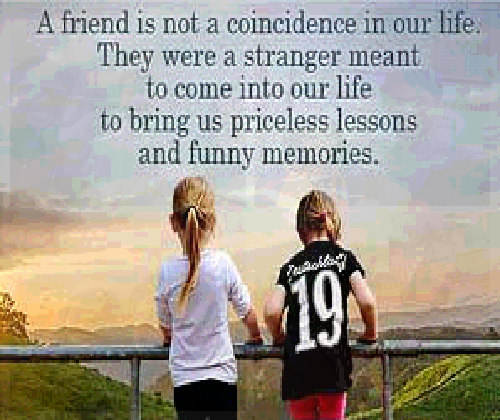

In [20]:
efile = Image.open("encrypted_image.png")
efile

### Decryption


In [21]:
Reim , Geim, Beim = image2bits(efile, width, height, bits)

In [22]:
DeRim = Reim
DeGim = Geim
DeBim = Beim
for i in range(0,width):
    for j in range(0,height):
        DeRim[i][j] = np.hstack(( Reim[i][j][4:8],[0,0,0,0]))
        DeGim[i][j] = np.hstack(( Geim[i][j][4:8],[0,0,0,0]))
        DeBim[i][j] = np.hstack(( Beim[i][j][4:8],[0,0,0,0]))


### Converting to pixel values

In [23]:
Rde = np.zeros((width, height))
Gde = np.zeros((width, height))
Bde = np.zeros((width, height))
for i in range(0,width):
    for j in range(0, height):
        rdeim = 0
        gdeim = 0
        bdeim = 0
        for k in range(0,bits):
            rdeim +=  DeRim[i][j][k] * (2 ** (bits -1 - k))
            gdeim +=  DeGim[i][j][k] * (2 ** (bits -1 - k))
            bdeim +=  DeBim[i][j][k] * (2 ** (bits -1 - k))
        Rde[i,j] = (rdeim)
        Gde[i,j] = (gdeim)
        Bde[i,j] = (bdeim)


In [24]:
decrypted_image = np.zeros((height, width,3),dtype = np.uint8)


In [25]:
decrypted_image[:,:,0] = Rde.T
decrypted_image[:,:,1] = Gde.T
decrypted_image[:,:,2] = Bde.T

In [26]:
deim = Image.fromarray(decrypted_image,  'RGB')
deim.save("decrypted_image.png")

### Displaying decrypted image

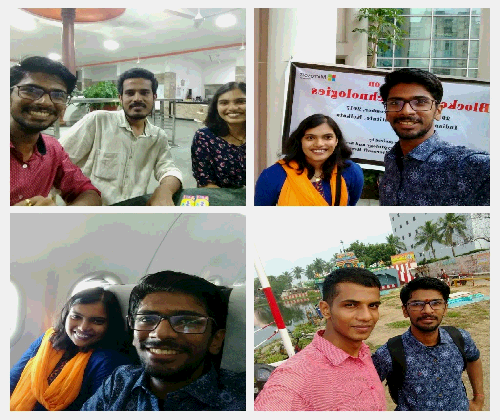

In [27]:
defile = Image.open("decrypted_image.png")
defile